Name -: Abhinav Bhatt <br>
Matriculation Number -: 7010946 <br>
Email ID -: abbh00001@stud.uni-saarland.de
    
Name -: Deepa Rani Mahato <br>
Matriculation Number -: 7012336 <br>
Email ID -: dema00001@stud.uni-saarland.de

**This notebook contains our runtime code for the Task 2 of the NLP based project. All the functions required from the .py files located in src folder  are imported in the beginning.**

In [3]:
# Load the required methods from the src folder which are to be used in this notebook
from src.dataset import read_dataset_hindi, clean_data_and_remove_stopwords, get_splits, read_dataset_bengali
from src.dataset import get_vocab, convert_to_index, TextDataset, get_dataloaders
from src.models import CNN, create_embeddings_matrix, CNN_extend
from src.train import train_and_evaluate, train, evaluate
from src.create_bengali_embeddings import create_bengali_embeddings
from src.utils import create_plots
import torch

In [4]:
# Set the device available. We will then pass the device variable in the training loop.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Preprocessing the Hindi dataset and training the end to end neural model on the Hindi hatespeech dataset where we initialise the embeddings to those learned on Hindi dataset in Task 1.


In [5]:
# Read the hindi dataset file.
df = read_dataset_hindi(file_path="data/hindi_hatespeech.tsv")

# Clean the data and remove the stopwords. The procedure for cleaning is same as that followed in task 1.
df = clean_data_and_remove_stopwords(df, stopwords_file_path="data/stopwords-hi.txt")
df.head()

,text_id,text,task_1,task_2,task_3
0,hasoc_hi_5556,बांग्लादेश शानदार वापसी भारत रन रोका,0,NONE,NONE
1,hasoc_hi_5648,सब रंडी नाच देखने व्यस्त ांतीदूत होगा सब ंडीरो...,1,PRFN,UNT
2,hasoc_hi_164,तुम हरामियों बस जूतों कमी शुक्र तुम्हारी लिंचि...,1,PRFN,TIN
3,hasoc_hi_3530,बीजेपी आकाश विजयवर्गीय जेल रिहा जमानत मिलने खु...,0,NONE,NONE
4,hasoc_hi_5206,चमकी बुखार विधानसभा परिसर आरजेडी प्रदर्शन तेजस...,0,NONE,NONE


In [6]:
# Create the train, test and validation split from the dataset.
df_train_hindi, df_val_hindi, df_test_hindi = get_splits(df)
print("Shape of the splitted dataframes is : ", df_train_hindi.shape, df_val_hindi.shape, df_test_hindi.shape)

Shape of the splitted dataframes is :  (3064, 5) (657, 5) (657, 5)


In [7]:
# Create vocabulary from our training set.
word2idx_hindi, idx2word_hindi = get_vocab(df_train_hindi)

# Create the Data Loaders for the datasets
train_loader_hindi, val_loader_hindi, test_loader_hindi = get_dataloaders(df_train_hindi, df_val_hindi, df_test_hindi, word2idx_hindi, batch_size = 8)

# Create the embeddings matrix from the embeddings which we trained in task 1 using the words from our vocabulary.
embeddings_matrix_hindi = create_embeddings_matrix("data/embeddings_hindi.txt", word2idx_hindi)
print("The size of the embeddings matrix for the hindi dataset is : ", embeddings_matrix_hindi.shape)

/content/src/dataset.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["text_indices"] = indices_sentences


The size of the embeddings matrix for the hindi dataset is :  torch.Size([12586, 300])


In [11]:
vocab_size_hindi = len(word2idx_hindi)
embedding_dim = 300
out_dim = 1

# Create the object for our CNN class.
model = CNN(vocab_size_hindi, embedding_dim, out_dim, embeddings_matrix_hindi, trainable=False).to(device)

In [12]:
# Number of epochs.
num_epochs = 40

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=4e-5)

# decay rate for the exponential learning rate scheduler.
decay_rate = 0.96
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [13]:
# Train and evaluate the model on the train and validation set, test set respectively.
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_hindi, val_loader_hindi, test_loader_hindi, optimizer, criterion, device, lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.697 | Train Acc: 53.10%
Val. Loss: 0.680  |  Val. Acc: 56.17%
Test. Loss: 0.686 |  Val. Acc: 53.01%
======================EPOCH 1=========================
Train Loss: 0.668 | Train Acc: 59.66%
Val. Loss: 0.668  |  Val. Acc: 56.02%
Test. Loss: 0.675 |  Val. Acc: 57.53%
======================EPOCH 2=========================
Train Loss: 0.647 | Train Acc: 63.38%
Val. Loss: 0.659  |  Val. Acc: 57.38%
Test. Loss: 0.666 |  Val. Acc: 60.99%
======================EPOCH 3=========================
Train Loss: 0.624 | Train Acc: 67.82%
Val. Loss: 0.652  |  Val. Acc: 62.95%
Test. Loss: 0.659 |  Val. Acc: 62.20%
======================EPOCH 4=========================
Train Loss: 0.610 | Train Acc: 70.33%
Val. Loss: 0.645  |  Val. Acc: 66.11%
Test. Loss: 0.652 |  Val. Acc: 63.86%
======================EPOCH 5=========================
Train Loss: 0.593 | Train Acc: 73.63%
Val. Loss: 0.635  |  Val. Acc: 66.27%
Test. Loss: 0.644 |  Val

In [14]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_cnn_Hindi.pth")

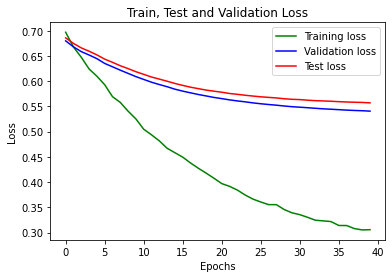

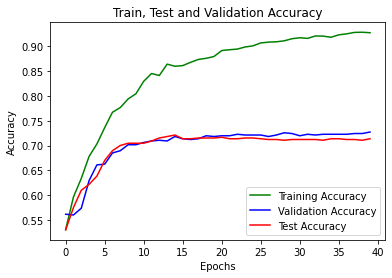

In [15]:
# Creating the plots for the loss and accuracies on the train, validation and test split.
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

## Splitting the Bengali corpus so that it roughly equals Hindi Corpus in size and distribution of classes and applying the preprocessing pipeline from task 1 to it.

In [16]:
# Reading the Bengali dataset. This function also makes the size and distribution of classes similar to that of the Hindi dataset. 
df = read_dataset_bengali(file_path="data/bengali_hatespeech.csv")

In [17]:
# Clean the dataset and remove stopwords. Although removing stopwords might not be helpful here because of the stopwords are in Hindi. 
# The preprocessing pipeline is the same as that of task 1.
df = clean_data_and_remove_stopwords(df, stopwords_file_path="data/stopwords-hi.txt")
df.head()

,text,task_1,category
0,ষাঁড় মীর জাফর ইকবাল স্ট্রাইক,1,celebrity
1,ভাই আবার মন্তব্য করলামএই শালা দের জুতা মারো আর...,1,religion
2,জয় একটা জানোয়ার ওর এসব নিয়েই মাতামাতি ও হাশোর ...,1,"Meme, TikTok and others"
3,শালা ভন্ড মাদার,1,religion
4,এই মাগিরে দরো আর সবাই চোদো,1,crime


## Using the model created in Task 1 to create Bengali embeddings
All of the code in "create_bengali_embeddings" function is same as that done in Task 1 notebook. We ran it once earlier so we interrupt the code cell execution the second time.

In [ ]:
# This method creates the Bengali embeddings and saves them in the data/ folder. 
create_bengali_embeddings(df, device)

14011 Counter({'না': 980, 'এই': 745, 'করে': 603, 'কি': 591, 'আর': 564, 'কে': 398, 'একটা': 319, 'কথা': 291, 'তুই': 288, 'আমি': 262, 'ও': 258, 'সব': 255, 'যে': 244, 'তো': 243, 'হয়': 241, 'তোর': 240, 'জন্য': 236, 'বাচ্চা': 233, 'হবে': 232, 'ভাই': 231, 'আমার': 231, 'কোন': 222, 'আপনার': 221, 'ভালো': 216, 'থেকে': 213, 'নাই': 212, 'এর': 207, 'কিছু': 203, 'সাথে': 198, 'আছে': 196, 'মনে': 195, 'করা': 195, 'মানুষ': 194, 'অনেক': 188, 'আপনি': 187, 'দিয়ে': 174, 'কেন': 172, 'চাই': 170, 'তার': 170, 'মাগি': 163, 'এখন': 163, 'করতে': 160, 'বলে': 154, 'দরকার': 152, 'জুতা': 149, 'যদি': 146, 'নিয়ে': 145, 'উচিত': 145, 'কুত্তার': 143, 'শালা': 142, 'পাপন': 138, 'হোক': 133, 'মত': 130, 'এ': 127, 'তাহলে': 126, 'খানকির': 121, 'ভিডিও': 121, 'সে': 120, 'টা': 120, 'সালা': 119, 'হয়ে': 118, 'তাদের': 118, 'এক': 118, 'আমাদের': 113, 'কাছে': 112, 'বড়': 112, 'এটা': 111, 'কিন্তু': 108, 'আল্লাহ': 107, 'মাগির': 106, 'তাই': 106, 'তারা': 105, 'সবাই': 104, 'মতো': 104, 'আমরা': 104, 'ছিল': 102, 'স্যার': 101, 'এমন': 99, 'ভন্ড': 98, 

KeyboardInterrupt: ignored

## Now, doing dataloader preparation for the Bengali dataset.

In [18]:
# Create the train, test and validation split from the dataset.
df_train_bengali, df_val_bengali, df_test_bengali = get_splits(df)

# Create vocabulary from our training set.
word2idx_bengali, idx2word_bengali = get_vocab(df_train_bengali)

# Create the Data Loaders for the datasets
train_loader_bengali, val_loader_bengali, test_loader_bengali = get_dataloaders(df_train_bengali, df_val_bengali, df_test_bengali, word2idx_bengali, batch_size=8)

/content/src/dataset.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["text_indices"] = indices_sentences


In [19]:
# Create the embeddings matrix from the Bengali embeddings which we trained previously.

embeddings_matrix_bengali = create_embeddings_matrix("data/embeddings _Bengali.txt", word2idx_bengali)
print("The shape of the embeddings matrix is : ", embeddings_matrix_bengali.shape)

The shape of the embeddings matrix is :  torch.Size([11137, 300])


## Now, we will try some transfer learning approaches.

**Now, we will apply the classifier to the Bengali data. For the first approach, we will initialise the weights of the classifier to those of trained on the Hindi dataset above, while the input to the model are Bengali embeddings. We are checking if there is some implicit transfer learning between Hindi and Bengali, and we are also checking how does the model trained on Hindi performs on Bengali dataset. Although we do not expect this method to perform well as the model is trained on Hindi dataset and has never seen Bengali**

In [20]:
# Vocabulary size for the Bengali dataset.
vocab_size_bengali = len(word2idx_bengali)

# Creating the model object for the Bengali dataset.
model = CNN(vocab_size_bengali, embedding_dim, out_dim, embeddings_matrix_bengali, trainable=False)

In [21]:
state_dict = torch.load("weights_models/weights_cnn_Hindi.pth")

# Replacing the input Hindi embeddings by the Bengali embeddings.
state_dict["emb.weight"] = embeddings_matrix_bengali

# Setting the weights of the classifier to the Hindi classifier. 
model.load_state_dict(state_dict)
model.to(device)

CNN(
  (emb): Embedding(11137, 300)
  (convs_list): ModuleList(
    (0): Conv1d(300, 18, kernel_size=(2,), stride=(1,))
    (1): Conv1d(300, 18, kernel_size=(3,), stride=(1,))
    (2): Conv1d(300, 18, kernel_size=(4,), stride=(1,))
    (3): Conv1d(300, 18, kernel_size=(5,), stride=(1,))
  )
  (dropout): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=72, out_features=1, bias=True)
)

In [22]:
# Evaluating the model on the Bengali test dataset without any training.
test_loss, test_acc = evaluate(model, test_loader_bengali, criterion, device)
print(f'\t Test Loss: {test_loss:.3f} |  Test Acc: {test_acc*100:.2f}%')

	 Test Loss: 0.934 |  Test Acc: 45.58%


**Now, for the next method, we will try to use transfer learning by adding 2 linear layers on top of outputs by the previous Hindi trained CNN layers
 (Hindi Classifier weights and Bengali embeddings) and then train only those last layers while keeping all other parameters fixed.**

In [23]:
# Freezing the parameters for the model since we do not want to train the cNN weights but just the last layers.
for param in model.parameters():
  param.requires_grad = False

In [24]:
# Getting the new extended model with 2 linear layers added at the end.
model = CNN_extend(model)

In [25]:
# Checking which of our layers are trainable.
for name, param in model.named_parameters():
  print(name, param.requires_grad)

model.emb.weight False
model.convs_list.0.weight False
model.convs_list.0.bias False
model.convs_list.1.weight False
model.convs_list.1.bias False
model.convs_list.2.weight False
model.convs_list.2.bias False
model.convs_list.3.weight False
model.convs_list.3.bias False
model.out.weight True
model.out.bias True
out.weight True
out.bias True


In [26]:
# Number of epochs.
num_epochs = 40

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=4e-5)

# decay rate for the exponential learning rate scheduler.
decay_rate = 0.96
my_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [27]:
# Training the last 2 layers on the Bengali dataset.
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, my_lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.690 | Train Acc: 55.26%
Val. Loss: 0.686  |  Val. Acc: 54.73%
Test. Loss: 0.686 |  Val. Acc: 54.57%
======================EPOCH 1=========================
Train Loss: 0.689 | Train Acc: 54.40%
Val. Loss: 0.686  |  Val. Acc: 54.88%
Test. Loss: 0.686 |  Val. Acc: 54.42%
======================EPOCH 2=========================
Train Loss: 0.685 | Train Acc: 55.23%
Val. Loss: 0.690  |  Val. Acc: 52.29%
Test. Loss: 0.689 |  Val. Acc: 55.64%
======================EPOCH 3=========================
Train Loss: 0.688 | Train Acc: 54.94%
Val. Loss: 0.684  |  Val. Acc: 55.34%
Test. Loss: 0.685 |  Val. Acc: 55.34%
======================EPOCH 4=========================
Train Loss: 0.686 | Train Acc: 55.36%
Val. Loss: 0.684  |  Val. Acc: 55.18%
Test. Loss: 0.685 |  Val. Acc: 54.42%
======================EPOCH 5=========================
Train Loss: 0.689 | Train Acc: 55.07%
Val. Loss: 0.684  |  Val. Acc: 55.03%
Test. Loss: 0.685 |  Val

**Now, for the last transfer learning method, we will try to use transfer learning by initialising our weights to the Hindi classifier weights (with input as Bengali embeddings), and then fine tuning the whole model on the Bengali dataset (we still keep the embeddings as frozen). We will see whether initialising our model weights to Hindi classifier weights improves the accuracy.**

In [28]:
# Creating the model object
model = CNN(vocab_size_bengali, embedding_dim, out_dim, embeddings_matrix_bengali, trainable=False)

In [29]:
# Loading the weights of the previously trained Hindi Classifier
state_dict = torch.load("weights_models/weights_cnn_Hindi.pth")

# Replacing the input Hindi embeddings by the Bengali embeddings.
state_dict["emb.weight"] = embeddings_matrix_bengali

# Setting the weights of the classifier to the Hindi classifier
model.load_state_dict(state_dict)
model.to(device)

CNN(
  (emb): Embedding(11137, 300)
  (convs_list): ModuleList(
    (0): Conv1d(300, 18, kernel_size=(2,), stride=(1,))
    (1): Conv1d(300, 18, kernel_size=(3,), stride=(1,))
    (2): Conv1d(300, 18, kernel_size=(4,), stride=(1,))
    (3): Conv1d(300, 18, kernel_size=(5,), stride=(1,))
  )
  (dropout): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=72, out_features=1, bias=True)
)

In [30]:
# Freezing the embedding layer
model.emb.weight.requires_grad = False

# Checking which of the parameters we are updating.
for name, param in model.named_parameters():
  print(name, param.requires_grad)

emb.weight False
convs_list.0.weight True
convs_list.0.bias True
convs_list.1.weight True
convs_list.1.bias True
convs_list.2.weight True
convs_list.2.bias True
convs_list.3.weight True
convs_list.3.bias True
out.weight True
out.bias True


In [31]:
# Number of epochs.
num_epochs = 40

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=4e-5)

# decay rate for the exponential learning rate scheduler.
decay_rate = 0.96
my_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [32]:
# training the model
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, my_lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.790 | Train Acc: 48.83%
Val. Loss: 0.733  |  Val. Acc: 48.48%
Test. Loss: 0.712 |  Val. Acc: 53.96%
======================EPOCH 1=========================
Train Loss: 0.747 | Train Acc: 51.74%
Val. Loss: 0.721  |  Val. Acc: 49.24%
Test. Loss: 0.699 |  Val. Acc: 55.64%
======================EPOCH 2=========================
Train Loss: 0.716 | Train Acc: 55.45%
Val. Loss: 0.714  |  Val. Acc: 50.91%
Test. Loss: 0.696 |  Val. Acc: 56.25%
======================EPOCH 3=========================
Train Loss: 0.688 | Train Acc: 56.71%
Val. Loss: 0.705  |  Val. Acc: 52.29%
Test. Loss: 0.687 |  Val. Acc: 58.69%
======================EPOCH 4=========================
Train Loss: 0.670 | Train Acc: 58.37%
Val. Loss: 0.700  |  Val. Acc: 52.44%
Test. Loss: 0.682 |  Val. Acc: 56.10%
======================EPOCH 5=========================
Train Loss: 0.640 | Train Acc: 63.78%
Val. Loss: 0.695  |  Val. Acc: 54.57%
Test. Loss: 0.678 |  Val

In [33]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_cnn_transfer_learning_Bengali.pth")

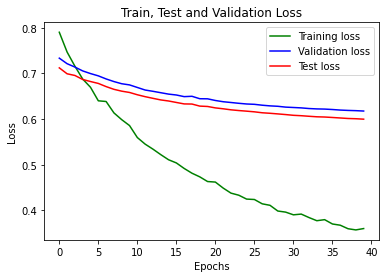

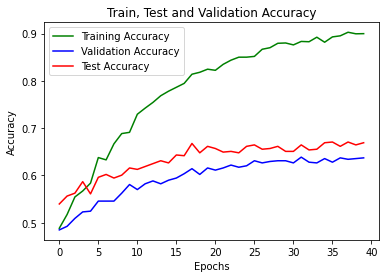

In [34]:
# Creating the loss and accuracy plots for the train, validation and test datasets.
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

## Now, we will retrain a new classifier on the Bengali dataset with input as the Bengali embeddings trained in Task 1.

In [35]:
# Creating the model object
model = CNN(vocab_size_bengali, embedding_dim, out_dim, embeddings_matrix_bengali, trainable=False)

In [36]:
# Number of epochs.
num_epochs = 40

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=4e-5)

decay_rate = 0.96
my_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [37]:
# Training the model.
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, my_lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.701 | Train Acc: 52.39%
Val. Loss: 0.687  |  Val. Acc: 53.35%
Test. Loss: 0.682 |  Val. Acc: 56.71%
======================EPOCH 1=========================
Train Loss: 0.681 | Train Acc: 56.42%
Val. Loss: 0.683  |  Val. Acc: 56.25%
Test. Loss: 0.678 |  Val. Acc: 60.67%
======================EPOCH 2=========================
Train Loss: 0.659 | Train Acc: 62.25%
Val. Loss: 0.676  |  Val. Acc: 57.01%
Test. Loss: 0.670 |  Val. Acc: 58.69%
======================EPOCH 3=========================
Train Loss: 0.644 | Train Acc: 63.91%
Val. Loss: 0.672  |  Val. Acc: 56.86%
Test. Loss: 0.665 |  Val. Acc: 61.89%
======================EPOCH 4=========================
Train Loss: 0.626 | Train Acc: 67.59%
Val. Loss: 0.667  |  Val. Acc: 61.13%
Test. Loss: 0.661 |  Val. Acc: 63.57%
======================EPOCH 5=========================
Train Loss: 0.608 | Train Acc: 71.59%
Val. Loss: 0.663  |  Val. Acc: 63.57%
Test. Loss: 0.657 |  Val

In [38]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_cnn_Bengali.pth")

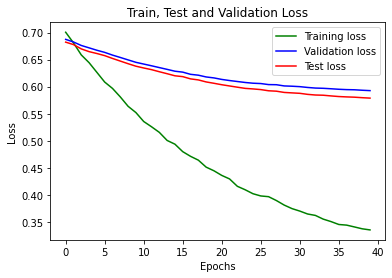

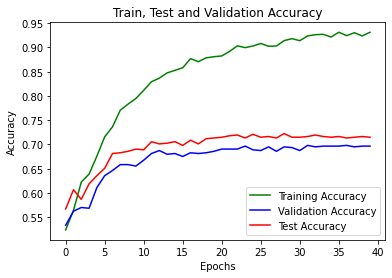

In [39]:
# Creating the loss and accuracy plots for the train, validation and test datasets.
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)